# Post Analysis 1 - 2022 TOP 20 zip codes in Housing Price Increase

In this notebook, I analyze the forecasted data. I find the TOP 20 ZIP codes in terms of the housing price increase and plot them on a map using Geo Pandas.


In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import contextily as cx


First, I load my housing price forecast data.

In [2]:
df = pd.read_csv('Data/dcfull.csv')
df.head()

zipcode        date  median_listing_price  active_listing_count  netinflow  \
0    20001  2018-01-01              730000.0                  81.0      -61.0   
1    20001  2018-02-01              779000.0                  89.0     -138.0   
2    20001  2018-03-01              729000.0                 103.0     -163.0   
3    20001  2018-04-01              717000.0                 117.0      -94.0   
4    20001  2018-05-01              754950.0                 125.0     -131.0   

   change_price  change_listing  change_inflow  
0           NaN             NaN            NaN  
1           NaN             NaN            NaN  
2           NaN             NaN            NaN  
3           NaN             NaN            NaN  
4           NaN             NaN            NaN

Next, I load US zip codes shape file for Geo Panda. 

In [3]:
usa = gpd.read_file("../Data/Shape/tl_2019_us_zcta510/tl_2019_us_zcta510.shp")
usa['zipcode'] = usa.ZCTA5CE10.astype('int')
usa.head()

ZCTA5CE10 GEOID10 CLASSFP10 MTFCC10 FUNCSTAT10    ALAND10  AWATER10  \
0     43451   43451        B5   G6350          S   63484186    157689   
1     43452   43452        B5   G6350          S  121522304  13721730   
2     43456   43456        B5   G6350          S    9320975   1003775   
3     43457   43457        B5   G6350          S   48004681         0   
4     43458   43458        B5   G6350          S    2573816     39915   

    INTPTLAT10    INTPTLON10  \
0  +41.3183010  -083.6174935   
1  +41.5157923  -082.9809454   
2  +41.6318300  -082.8393923   
3  +41.2673301  -083.4274872   
4  +41.5304461  -083.2133648   

                                            geometry  zipcode  
0  POLYGON ((-83.70873 41.32733, -83.70815 41.327...    43451  
1  POLYGON ((-83.08698 41.53780, -83.08256 41.537...    43452  
2  MULTIPOLYGON (((-82.83558 41.71082, -82.83515 ...    43456  
3  POLYGON ((-83.49650 41.25371, -83.48382 41.253...    43457  
4  POLYGON ((-83.22229 41.53102, -83.22228 41.532...    43458

Next, I use my GeoIDs data (df_geo) to filter zip codes in Washington DC area. 

Read my GeoIDs data in below. 

In [4]:
# Read Geo Data 
df_g = pd.read_csv('Data/df_geo.csv')
# Include only Washington DC metro area 
cz = df_g[['countyname', 'countyfips', 'ZIP', 'stateabbrev']][df_g.czname=='Washington DC']
# Adjust columns names and data type 
cz.rename(columns={'ZIP':'zipcode', 'countyfips':'CTFIPS'}, inplace=True)
cz.CTFIPS = cz.CTFIPS.astype('int')


I merge us zip code shape files to GeoIDs data and drop outside of Washington DC metro area. 

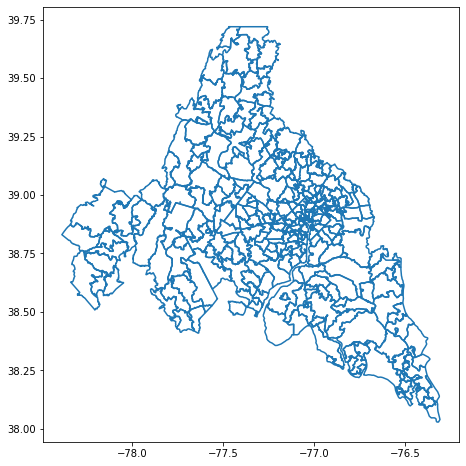

In [5]:
map_cz = usa.merge(cz, on='zipcode', how='inner')
map_cz.boundary.plot(figsize=(8, 8));

Now I have a zip code shape file which includes only Washington DC metro area. The above figure maps the zip codes included in my study. 

Currently, housing prices and my forecast data are on a monthly basis. To see the changes across years, I create a new data frame that averaged price data across years.

In the cell below, I created a year column from date data, and created the new data frame by year. 

In [6]:
df['yearmonth']=df.date.astype(str).str[:7]

df_year= df.groupby(['zipcode', 'yearmonth']).mean()

df_year.reset_index(inplace=True)


I merge the year data and the county shape file. 

In [7]:
# Merge with county map shape file 
df_map_year = map_cz.merge(df_year, on='zipcode', how ='right')
df_map_year.head()

ZCTA5CE10 GEOID10 CLASSFP10 MTFCC10 FUNCSTAT10  ALAND10  AWATER10  \
0     20001   20001        B5   G6350          S  5655798    159593   
1     20001   20001        B5   G6350          S  5655798    159593   
2     20001   20001        B5   G6350          S  5655798    159593   
3     20001   20001        B5   G6350          S  5655798    159593   
4     20001   20001        B5   G6350          S  5655798    159593   

    INTPTLAT10    INTPTLON10  \
0  +38.9103532  -077.0177386   
1  +38.9103532  -077.0177386   
2  +38.9103532  -077.0177386   
3  +38.9103532  -077.0177386   
4  +38.9103532  -077.0177386   

                                            geometry  ...  \
0  POLYGON ((-77.02829 38.91192, -77.02814 38.912...  ...   
1  POLYGON ((-77.02829 38.91192, -77.02814 38.912...  ...   
2  POLYGON ((-77.02829 38.91192, -77.02814 38.912...  ...   
3  POLYGON ((-77.02829 38.91192, -77.02814 38.912...  ...   
4  POLYGON ((-77.02829 38.91192, -77.02814 38.912...  ...   

             countyname CTFIPS  stateabbrev yearmonth median_listing_price  \
0  District Of Columbia  11001           DC   2018-01             730000.0   
1  District Of Columbia  11001           DC   2018-02             779000.0   
2  District Of Columbia  11001           DC   2018-03             729000.0   
3  District Of Columbia  11001           DC   2018-04             717000.0   
4  District Of Columbia  11001           DC   2018-05             754950.0   

   active_listing_count  netinflow  change_price  change_listing  \
0                  81.0      -61.0           NaN             NaN   
1                  89.0     -138.0           NaN             NaN   
2                 103.0     -163.0           NaN             NaN   
3                 117.0      -94.0           NaN             NaN   
4                 125.0     -131.0           NaN             NaN   

   change_inflow  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN  

[5 rows x 21 columns]

I create a new data frame for each year month, 2019-01 to 2022-12. 

In [9]:
df19jan = df_map_year[df_map_year.yearmonth=='2019-01']
df19feb = df_map_year[df_map_year.yearmonth=='2019-02']
df19mar = df_map_year[df_map_year.yearmonth=='2019-03']
df19apr = df_map_year[df_map_year.yearmonth=='2019-04']
df19may = df_map_year[df_map_year.yearmonth=='2019-05']
df19jun = df_map_year[df_map_year.yearmonth=='2019-06']
df19jul = df_map_year[df_map_year.yearmonth=='2019-07']
df19aug = df_map_year[df_map_year.yearmonth=='2019-08']
df19sep = df_map_year[df_map_year.yearmonth=='2019-09']
df19oct = df_map_year[df_map_year.yearmonth=='2019-10']
df19nov = df_map_year[df_map_year.yearmonth=='2019-11']
df19dec = df_map_year[df_map_year.yearmonth=='2019-12']

df20jan = df_map_year[df_map_year.yearmonth=='2020-01']
df20feb = df_map_year[df_map_year.yearmonth=='2020-02']
df20mar = df_map_year[df_map_year.yearmonth=='2020-03']
df20apr = df_map_year[df_map_year.yearmonth=='2020-04']
df20may = df_map_year[df_map_year.yearmonth=='2020-05']
df20jun = df_map_year[df_map_year.yearmonth=='2020-06']
df20jul = df_map_year[df_map_year.yearmonth=='2020-07']
df20aug = df_map_year[df_map_year.yearmonth=='2020-08']
df20sep = df_map_year[df_map_year.yearmonth=='2020-09']
df20oct = df_map_year[df_map_year.yearmonth=='2020-10']
df20nov = df_map_year[df_map_year.yearmonth=='2020-11']
df20dec = df_map_year[df_map_year.yearmonth=='2020-12']

df21jan = df_map_year[df_map_year.yearmonth=='2021-01']
df21feb = df_map_year[df_map_year.yearmonth=='2021-02']
df21mar = df_map_year[df_map_year.yearmonth=='2021-03']
df21apr = df_map_year[df_map_year.yearmonth=='2021-04']
df21may = df_map_year[df_map_year.yearmonth=='2021-05']
df21jun = df_map_year[df_map_year.yearmonth=='2021-06']
df21jul = df_map_year[df_map_year.yearmonth=='2021-07']
df21aug = df_map_year[df_map_year.yearmonth=='2021-08']
df21sep = df_map_year[df_map_year.yearmonth=='2021-09']
df21oct = df_map_year[df_map_year.yearmonth=='2021-10']
df21nov = df_map_year[df_map_year.yearmonth=='2021-11']
df21dec = df_map_year[df_map_year.yearmonth=='2021-12']

df22jan = df_map_year[df_map_year.yearmonth=='2022-01']
df22feb = df_map_year[df_map_year.yearmonth=='2022-02']
df22mar = df_map_year[df_map_year.yearmonth=='2022-03']
df22apr = df_map_year[df_map_year.yearmonth=='2022-04']
df22may = df_map_year[df_map_year.yearmonth=='2022-05']
df22jun = df_map_year[df_map_year.yearmonth=='2022-06']
df22jul = df_map_year[df_map_year.yearmonth=='2022-07']
df22aug = df_map_year[df_map_year.yearmonth=='2022-08']
df22sep = df_map_year[df_map_year.yearmonth=='2022-09']
df22oct = df_map_year[df_map_year.yearmonth=='2022-10']
df22nov = df_map_year[df_map_year.yearmonth=='2022-11']
df22dec = df_map_year[df_map_year.yearmonth=='2022-12']



Next, I plot housing price change by year-month on a map. 


Housing price changes in 2019 Jan.

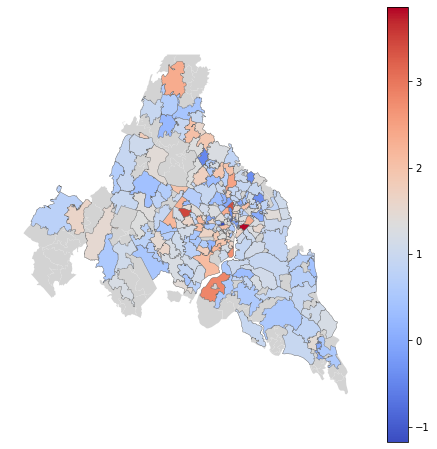

In [10]:
# 2019 Jan data 

# To keep uniform color scale across figrues 
vmin=df_map_year.change_price.min()
vmax=df_map_year.change_price.max()

# Plot a figure
fig, ax = plt.subplots(1, figsize=(8, 8))
plt.xticks(rotation=90)
map_cz.to_crs(epsg=4326).plot(ax=ax, color='lightgray')

df19jan.plot(column="change_price", cmap="coolwarm", linewidth=0.4, ax=ax, edgecolor=".4", missing_kwds={'color': 'lightgrey'})

bar_info = plt.cm.ScalarMappable(cmap="coolwarm", norm=plt.Normalize(vmin=vmin, vmax=vmax))
bar_info._A = []
cbar = fig.colorbar(bar_info)

ax.axis("off");



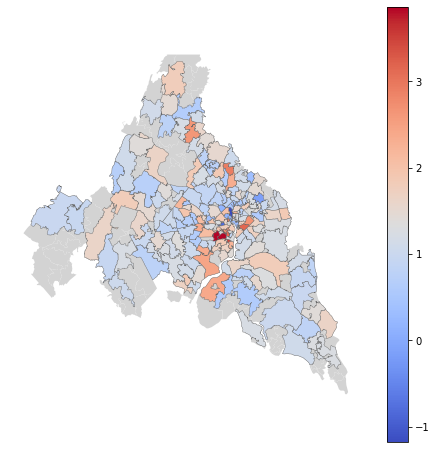

In [11]:
# 2019 Feb data 

# To keep uniform color scale across figrues 
vmin=df_map_year.change_price.min()
vmax=df_map_year.change_price.max()

# Plot a figure
fig, ax = plt.subplots(1, figsize=(8, 8))
plt.xticks(rotation=90)
map_cz.to_crs(epsg=4326).plot(ax=ax, color='lightgray')

df19feb.plot(column="change_price", cmap="coolwarm", linewidth=0.4, ax=ax, edgecolor=".4", missing_kwds={'color': 'lightgrey'})

bar_info = plt.cm.ScalarMappable(cmap="coolwarm", norm=plt.Normalize(vmin=vmin, vmax=vmax))
bar_info._A = []
cbar = fig.colorbar(bar_info)

ax.axis("off");


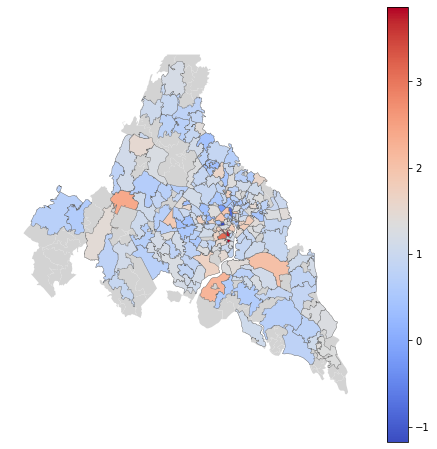

In [12]:
# 2019 Mar data 

# To keep uniform color scale across figrues 
vmin=df_map_year.change_price.min()
vmax=df_map_year.change_price.max()

# Plot a figure
fig, ax = plt.subplots(1, figsize=(8, 8))
plt.xticks(rotation=90)
map_cz.to_crs(epsg=4326).plot(ax=ax, color='lightgray')

df19mar.plot(column="change_price", cmap="coolwarm", linewidth=0.4, ax=ax, edgecolor=".4", missing_kwds={'color': 'lightgrey'})

bar_info = plt.cm.ScalarMappable(cmap="coolwarm", norm=plt.Normalize(vmin=vmin, vmax=vmax))
bar_info._A = []
cbar = fig.colorbar(bar_info)

ax.axis("off");


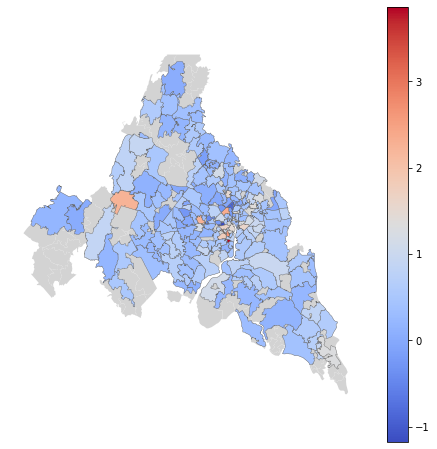

In [13]:
# 2019 Apr data 

# To keep uniform color scale across figrues 
vmin=df_map_year.change_price.min()
vmax=df_map_year.change_price.max()

# Plot a figure
fig, ax = plt.subplots(1, figsize=(8, 8))
plt.xticks(rotation=90)
map_cz.to_crs(epsg=4326).plot(ax=ax, color='lightgray')

df19apr.plot(column="change_price", cmap="coolwarm", linewidth=0.4, ax=ax, edgecolor=".4", missing_kwds={'color': 'lightgrey'})

bar_info = plt.cm.ScalarMappable(cmap="coolwarm", norm=plt.Normalize(vmin=vmin, vmax=vmax))
bar_info._A = []
cbar = fig.colorbar(bar_info)

ax.axis("off");


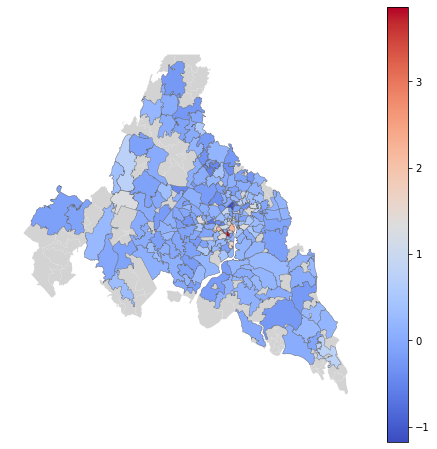

In [14]:
# 2019 May data 

# To keep uniform color scale across figrues 
vmin=df_map_year.change_price.min()
vmax=df_map_year.change_price.max()

# Plot a figure
fig, ax = plt.subplots(1, figsize=(8, 8))
plt.xticks(rotation=90)
map_cz.to_crs(epsg=4326).plot(ax=ax, color='lightgray')

df19may.plot(column="change_price", cmap="coolwarm", linewidth=0.4, ax=ax, edgecolor=".4", missing_kwds={'color': 'lightgrey'})

bar_info = plt.cm.ScalarMappable(cmap="coolwarm", norm=plt.Normalize(vmin=vmin, vmax=vmax))
bar_info._A = []
cbar = fig.colorbar(bar_info)

ax.axis("off");


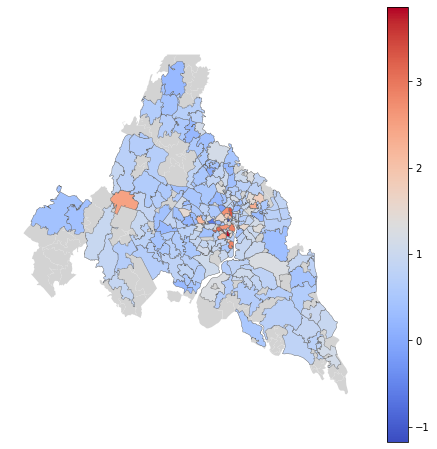

In [15]:
# 2019 July data 

# To keep uniform color scale across figrues 
vmin=df_map_year.change_price.min()
vmax=df_map_year.change_price.max()

# Plot a figure
fig, ax = plt.subplots(1, figsize=(8, 8))
plt.xticks(rotation=90)
map_cz.to_crs(epsg=4326).plot(ax=ax, color='lightgray')

df19jul.plot(column="change_price", cmap="coolwarm", linewidth=0.4, ax=ax, edgecolor=".4", missing_kwds={'color': 'lightgrey'})

bar_info = plt.cm.ScalarMappable(cmap="coolwarm", norm=plt.Normalize(vmin=vmin, vmax=vmax))
bar_info._A = []
cbar = fig.colorbar(bar_info)

ax.axis("off");


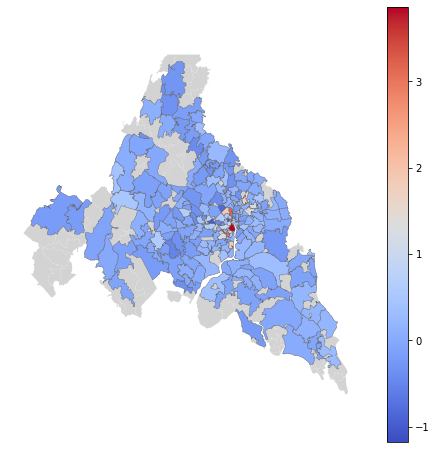

In [16]:
# 2019 Aug data 

# To keep uniform color scale across figrues 
vmin=df_map_year.change_price.min()
vmax=df_map_year.change_price.max()

# Plot a figure
fig, ax = plt.subplots(1, figsize=(8, 8))
plt.xticks(rotation=90)
map_cz.to_crs(epsg=4326).plot(ax=ax, color='lightgray')

df19aug.plot(column="change_price", cmap="coolwarm", linewidth=0.4, ax=ax, edgecolor=".4", missing_kwds={'color': 'lightgrey'})

bar_info = plt.cm.ScalarMappable(cmap="coolwarm", norm=plt.Normalize(vmin=vmin, vmax=vmax))
bar_info._A = []
cbar = fig.colorbar(bar_info)

ax.axis("off");


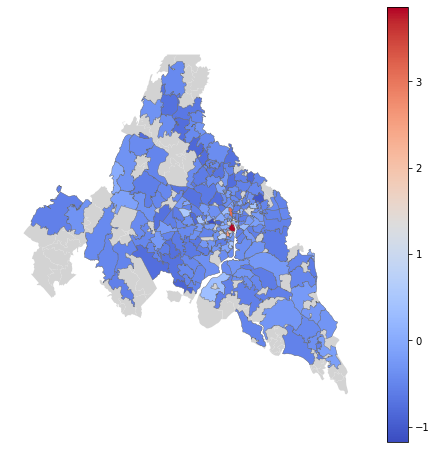

In [17]:
# 2019 Sep data 

# To keep uniform color scale across figrues 
vmin=df_map_year.change_price.min()
vmax=df_map_year.change_price.max()

# Plot a figure
fig, ax = plt.subplots(1, figsize=(8, 8))
plt.xticks(rotation=90)
map_cz.to_crs(epsg=4326).plot(ax=ax, color='lightgray')

df19sep.plot(column="change_price", cmap="coolwarm", linewidth=0.4, ax=ax, edgecolor=".4", missing_kwds={'color': 'lightgrey'})

bar_info = plt.cm.ScalarMappable(cmap="coolwarm", norm=plt.Normalize(vmin=vmin, vmax=vmax))
bar_info._A = []
cbar = fig.colorbar(bar_info)

ax.axis("off");


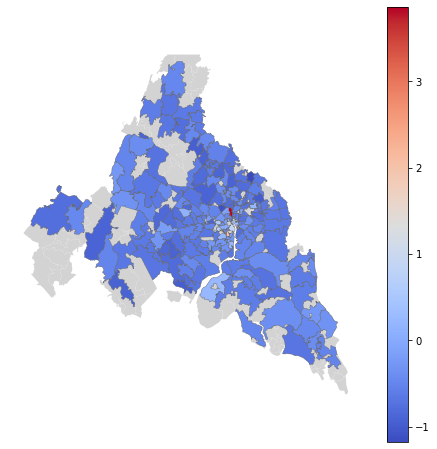

In [18]:
# 2019 Oct data 

# To keep uniform color scale across figrues 
vmin=df_map_year.change_price.min()
vmax=df_map_year.change_price.max()

# Plot a figure
fig, ax = plt.subplots(1, figsize=(8, 8))
plt.xticks(rotation=90)
map_cz.to_crs(epsg=4326).plot(ax=ax, color='lightgray')

df19oct.plot(column="change_price", cmap="coolwarm", linewidth=0.4, ax=ax, edgecolor=".4", missing_kwds={'color': 'lightgrey'})

bar_info = plt.cm.ScalarMappable(cmap="coolwarm", norm=plt.Normalize(vmin=vmin, vmax=vmax))
bar_info._A = []
cbar = fig.colorbar(bar_info)

ax.axis("off");


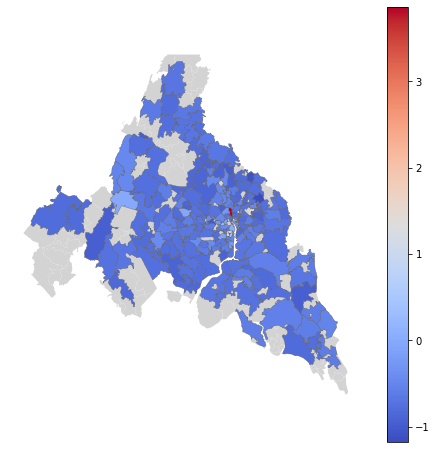

In [19]:
# 2019 nov data 

# To keep uniform color scale across figrues 
vmin=df_map_year.change_price.min()
vmax=df_map_year.change_price.max()

# Plot a figure
fig, ax = plt.subplots(1, figsize=(8, 8))
plt.xticks(rotation=90)
map_cz.to_crs(epsg=4326).plot(ax=ax, color='lightgray')

df19nov.plot(column="change_price", cmap="coolwarm", linewidth=0.4, ax=ax, edgecolor=".4", missing_kwds={'color': 'lightgrey'})

bar_info = plt.cm.ScalarMappable(cmap="coolwarm", norm=plt.Normalize(vmin=vmin, vmax=vmax))
bar_info._A = []
cbar = fig.colorbar(bar_info)

ax.axis("off");


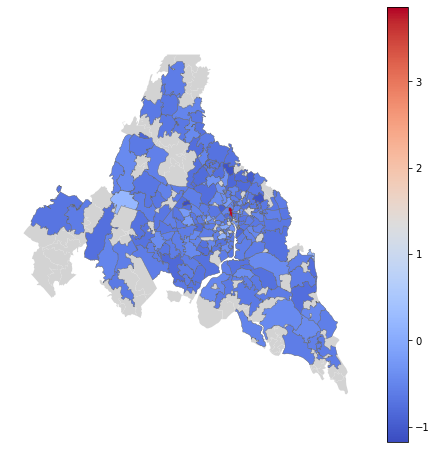

In [20]:
# 2019 Dec data 

# To keep uniform color scale across figrues 
vmin=df_map_year.change_price.min()
vmax=df_map_year.change_price.max()

# Plot a figure
fig, ax = plt.subplots(1, figsize=(8, 8))
plt.xticks(rotation=90)
map_cz.to_crs(epsg=4326).plot(ax=ax, color='lightgray')

df19dec.plot(column="change_price", cmap="coolwarm", linewidth=0.4, ax=ax, edgecolor=".4", missing_kwds={'color': 'lightgrey'})

bar_info = plt.cm.ScalarMappable(cmap="coolwarm", norm=plt.Normalize(vmin=vmin, vmax=vmax))
bar_info._A = []
cbar = fig.colorbar(bar_info)

ax.axis("off");


In 2019, the housing price increased only in a center of the city.

Next, I plot housing price changes in 2020.  

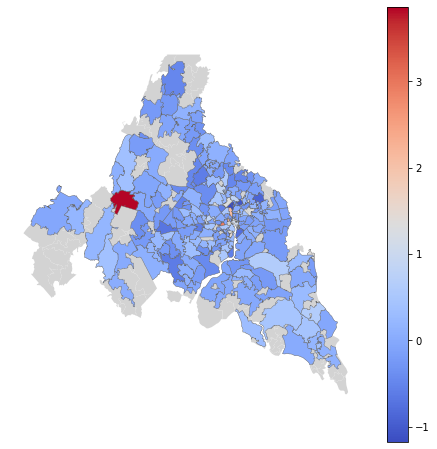

In [21]:
# Year 2020 Jan
fig, ax = plt.subplots(1, figsize=(8, 8))
plt.xticks(rotation=90)
map_cz.to_crs(epsg=4326).plot(ax=ax, color='lightgray')

df20jan.plot(column="change_price", cmap="coolwarm", linewidth=0.4, ax=ax, edgecolor=".4", missing_kwds={'color': 'lightgrey'})

bar_info = plt.cm.ScalarMappable(cmap="coolwarm", norm=plt.Normalize(vmin=vmin, vmax=vmax))
bar_info._A = []
cbar = fig.colorbar(bar_info)


ax.axis("off");

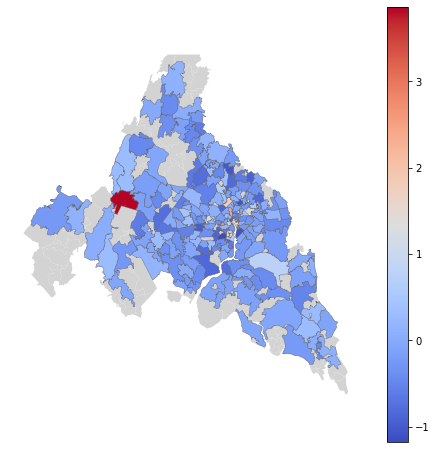

In [22]:
# Year 2020 Feb
fig, ax = plt.subplots(1, figsize=(8, 8))
plt.xticks(rotation=90)
map_cz.to_crs(epsg=4326).plot(ax=ax, color='lightgray')

df20feb.plot(column="change_price", cmap="coolwarm", linewidth=0.4, ax=ax, edgecolor=".4", missing_kwds={'color': 'lightgrey'})

bar_info = plt.cm.ScalarMappable(cmap="coolwarm", norm=plt.Normalize(vmin=vmin, vmax=vmax))
bar_info._A = []
cbar = fig.colorbar(bar_info)


ax.axis("off");

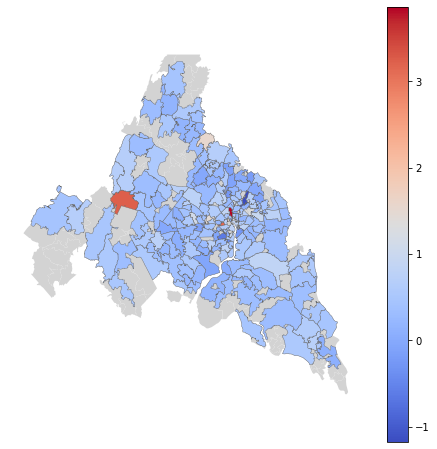

In [23]:
# Year 2020 Mar
fig, ax = plt.subplots(1, figsize=(8, 8))
plt.xticks(rotation=90)
map_cz.to_crs(epsg=4326).plot(ax=ax, color='lightgray')

df20mar.plot(column="change_price", cmap="coolwarm", linewidth=0.4, ax=ax, edgecolor=".4", missing_kwds={'color': 'lightgrey'})

bar_info = plt.cm.ScalarMappable(cmap="coolwarm", norm=plt.Normalize(vmin=vmin, vmax=vmax))
bar_info._A = []
cbar = fig.colorbar(bar_info)


ax.axis("off");

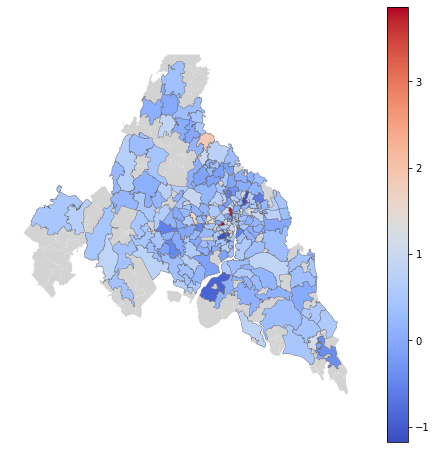

In [24]:
# Year 2020 Apr
fig, ax = plt.subplots(1, figsize=(8, 8))
plt.xticks(rotation=90)
map_cz.to_crs(epsg=4326).plot(ax=ax, color='lightgray')

df20apr.plot(column="change_price", cmap="coolwarm", linewidth=0.4, ax=ax, edgecolor=".4", missing_kwds={'color': 'lightgrey'})

bar_info = plt.cm.ScalarMappable(cmap="coolwarm", norm=plt.Normalize(vmin=vmin, vmax=vmax))
bar_info._A = []
cbar = fig.colorbar(bar_info)


ax.axis("off");

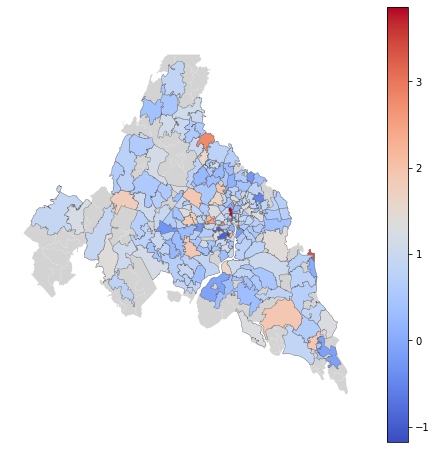

In [25]:
# Year 2020 May
fig, ax = plt.subplots(1, figsize=(8, 8))
plt.xticks(rotation=90)
map_cz.to_crs(epsg=4326).plot(ax=ax, color='lightgray')

df20may.plot(column="change_price", cmap="coolwarm", linewidth=0.4, ax=ax, edgecolor=".4", missing_kwds={'color': 'lightgrey'})

bar_info = plt.cm.ScalarMappable(cmap="coolwarm", norm=plt.Normalize(vmin=vmin, vmax=vmax))
bar_info._A = []
cbar = fig.colorbar(bar_info)


ax.axis("off");

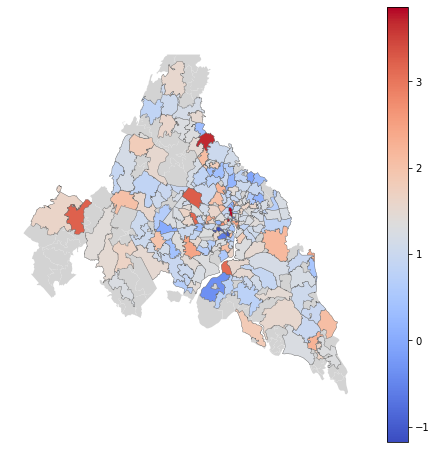

In [26]:
# Year 2020 June
fig, ax = plt.subplots(1, figsize=(8, 8))
plt.xticks(rotation=90)
map_cz.to_crs(epsg=4326).plot(ax=ax, color='lightgray')

df20jun.plot(column="change_price", cmap="coolwarm", linewidth=0.4, ax=ax, edgecolor=".4", missing_kwds={'color': 'lightgrey'})

bar_info = plt.cm.ScalarMappable(cmap="coolwarm", norm=plt.Normalize(vmin=vmin, vmax=vmax))
bar_info._A = []
cbar = fig.colorbar(bar_info)


ax.axis("off");

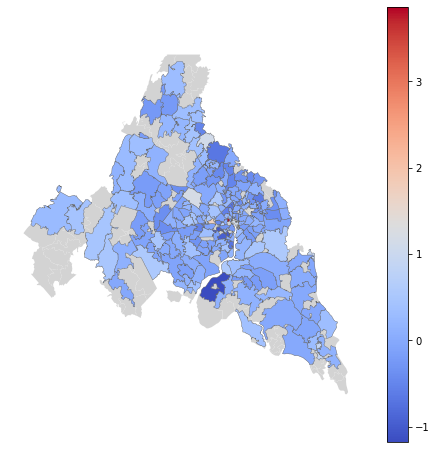

In [27]:
# Year 2020 July
fig, ax = plt.subplots(1, figsize=(8, 8))
plt.xticks(rotation=90)
map_cz.to_crs(epsg=4326).plot(ax=ax, color='lightgray')

df20jul.plot(column="change_price", cmap="coolwarm", linewidth=0.4, ax=ax, edgecolor=".4", missing_kwds={'color': 'lightgrey'})

bar_info = plt.cm.ScalarMappable(cmap="coolwarm", norm=plt.Normalize(vmin=vmin, vmax=vmax))
bar_info._A = []
cbar = fig.colorbar(bar_info)


ax.axis("off");

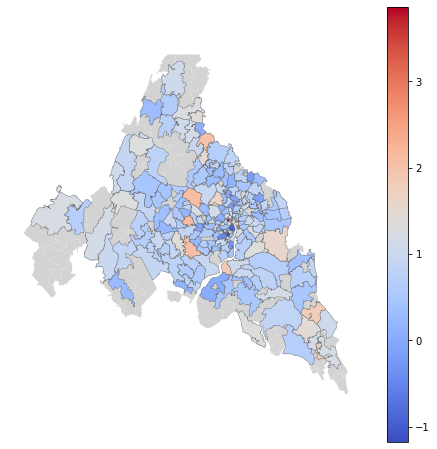

In [28]:
# Year 2020 Aug
fig, ax = plt.subplots(1, figsize=(8, 8))
plt.xticks(rotation=90)
map_cz.to_crs(epsg=4326).plot(ax=ax, color='lightgray')

df20aug.plot(column="change_price", cmap="coolwarm", linewidth=0.4, ax=ax, edgecolor=".4", missing_kwds={'color': 'lightgrey'})

bar_info = plt.cm.ScalarMappable(cmap="coolwarm", norm=plt.Normalize(vmin=vmin, vmax=vmax))
bar_info._A = []
cbar = fig.colorbar(bar_info)


ax.axis("off");

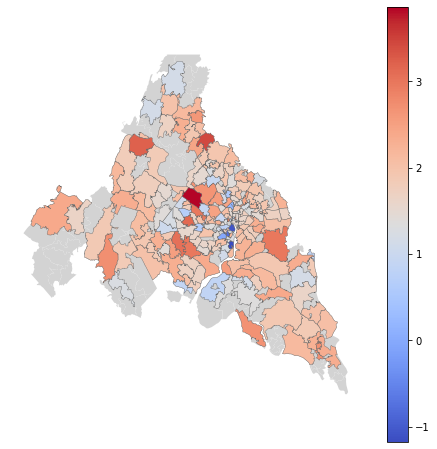

In [29]:
# Year 2020 Sep
fig, ax = plt.subplots(1, figsize=(8, 8))
plt.xticks(rotation=90)
map_cz.to_crs(epsg=4326).plot(ax=ax, color='lightgray')

df20sep.plot(column="change_price", cmap="coolwarm", linewidth=0.4, ax=ax, edgecolor=".4", missing_kwds={'color': 'lightgrey'})

bar_info = plt.cm.ScalarMappable(cmap="coolwarm", norm=plt.Normalize(vmin=vmin, vmax=vmax))
bar_info._A = []
cbar = fig.colorbar(bar_info)


ax.axis("off");

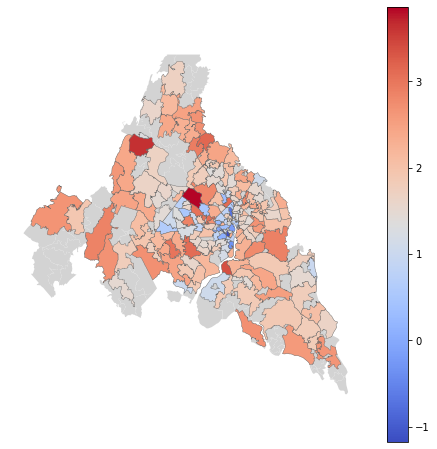

In [30]:
# Year 2020 Oct
fig, ax = plt.subplots(1, figsize=(8, 8))
plt.xticks(rotation=90)
map_cz.to_crs(epsg=4326).plot(ax=ax, color='lightgray')

df20oct.plot(column="change_price", cmap="coolwarm", linewidth=0.4, ax=ax, edgecolor=".4", missing_kwds={'color': 'lightgrey'})

bar_info = plt.cm.ScalarMappable(cmap="coolwarm", norm=plt.Normalize(vmin=vmin, vmax=vmax))
bar_info._A = []
cbar = fig.colorbar(bar_info)


ax.axis("off");

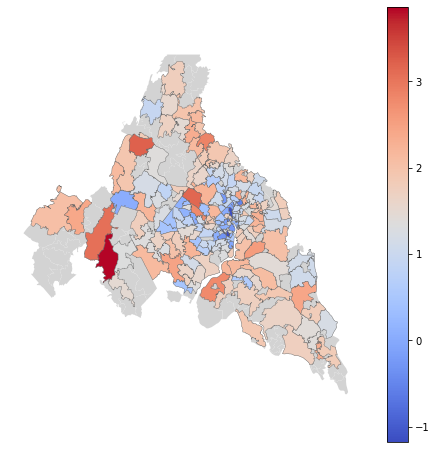

In [31]:
# Year 2020 Nov
fig, ax = plt.subplots(1, figsize=(8, 8))
plt.xticks(rotation=90)
map_cz.to_crs(epsg=4326).plot(ax=ax, color='lightgray')

df20nov.plot(column="change_price", cmap="coolwarm", linewidth=0.4, ax=ax, edgecolor=".4", missing_kwds={'color': 'lightgrey'})

bar_info = plt.cm.ScalarMappable(cmap="coolwarm", norm=plt.Normalize(vmin=vmin, vmax=vmax))
bar_info._A = []
cbar = fig.colorbar(bar_info)


ax.axis("off");

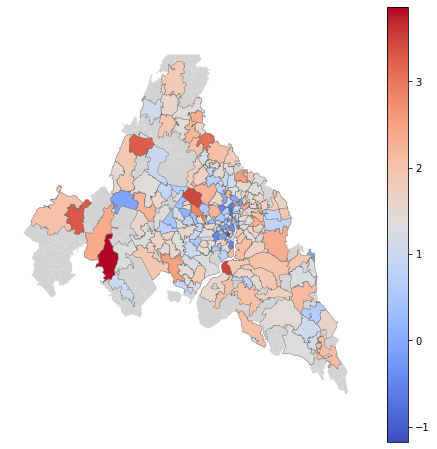

In [32]:
# Year 2020 Dec
fig, ax = plt.subplots(1, figsize=(8, 8))
plt.xticks(rotation=90)
map_cz.to_crs(epsg=4326).plot(ax=ax, color='lightgray')

df20dec.plot(column="change_price", cmap="coolwarm", linewidth=0.4, ax=ax, edgecolor=".4", missing_kwds={'color': 'lightgrey'})

bar_info = plt.cm.ScalarMappable(cmap="coolwarm", norm=plt.Normalize(vmin=vmin, vmax=vmax))
bar_info._A = []
cbar = fig.colorbar(bar_info)


ax.axis("off");

In 2020, starting from May (as people realize Work From Home continue for a while), the housing prices outside of the city started rising. 

Next, I plot housing price changes in 2021. 

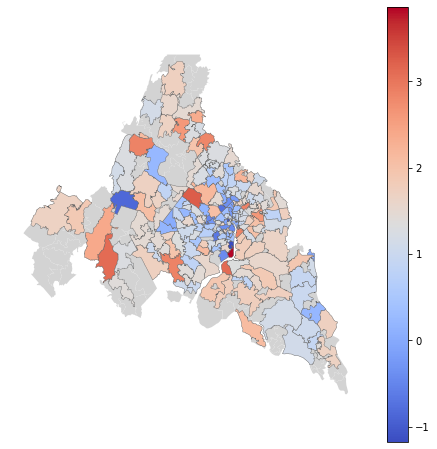

In [33]:
# year 2021 Jan

fig, ax = plt.subplots(1, figsize=(8, 8))
plt.xticks(rotation=90)
map_cz.to_crs(epsg=4326).plot(ax=ax, color='lightgray')
df21jan.plot(column="change_price", cmap="coolwarm", linewidth=0.4, ax=ax, edgecolor=".4", missing_kwds={'color': 'lightgrey'})

bar_info = plt.cm.ScalarMappable(cmap="coolwarm", norm=plt.Normalize(vmin=vmin, vmax=vmax))
bar_info._A = []
cbar = fig.colorbar(bar_info)


ax.axis("off");

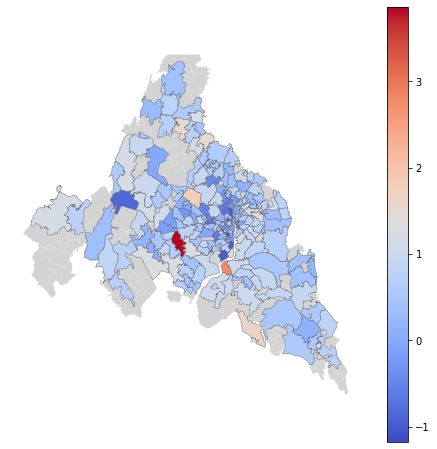

In [34]:
# year 2021 Feb

fig, ax = plt.subplots(1, figsize=(8, 8))
plt.xticks(rotation=90)
map_cz.to_crs(epsg=4326).plot(ax=ax, color='lightgray')
df21feb.plot(column="change_price", cmap="coolwarm", linewidth=0.4, ax=ax, edgecolor=".4", missing_kwds={'color': 'lightgrey'})

bar_info = plt.cm.ScalarMappable(cmap="coolwarm", norm=plt.Normalize(vmin=vmin, vmax=vmax))
bar_info._A = []
cbar = fig.colorbar(bar_info)


ax.axis("off");

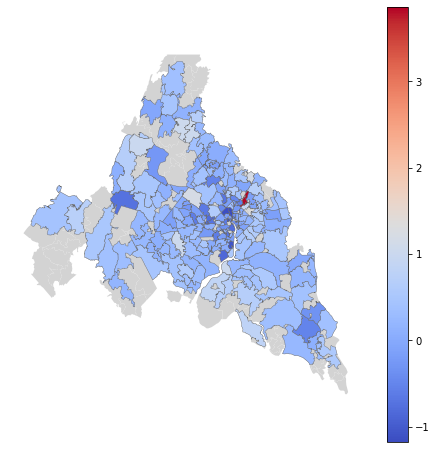

In [35]:
# year 2021 Mar

fig, ax = plt.subplots(1, figsize=(8, 8))
plt.xticks(rotation=90)
map_cz.to_crs(epsg=4326).plot(ax=ax, color='lightgray')
df21mar.plot(column="change_price", cmap="coolwarm", linewidth=0.4, ax=ax, edgecolor=".4", missing_kwds={'color': 'lightgrey'})

bar_info = plt.cm.ScalarMappable(cmap="coolwarm", norm=plt.Normalize(vmin=vmin, vmax=vmax))
bar_info._A = []
cbar = fig.colorbar(bar_info)


ax.axis("off");

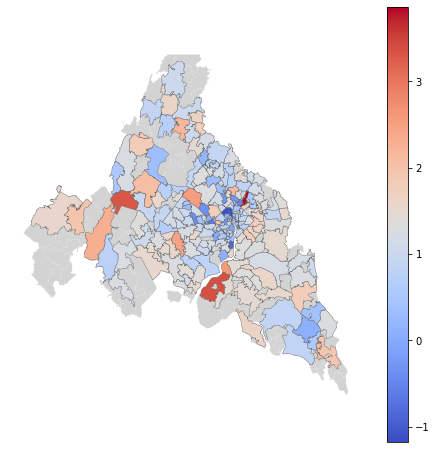

In [36]:
# year 2021 Apr

fig, ax = plt.subplots(1, figsize=(8, 8))
plt.xticks(rotation=90)
map_cz.to_crs(epsg=4326).plot(ax=ax, color='lightgray')
df21apr.plot(column="change_price", cmap="coolwarm", linewidth=0.4, ax=ax, edgecolor=".4", missing_kwds={'color': 'lightgrey'})

bar_info = plt.cm.ScalarMappable(cmap="coolwarm", norm=plt.Normalize(vmin=vmin, vmax=vmax))
bar_info._A = []
cbar = fig.colorbar(bar_info)


ax.axis("off");

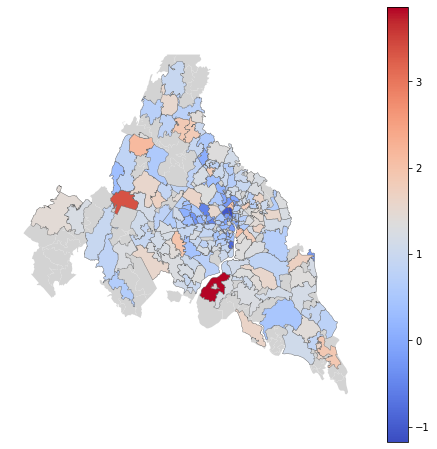

In [37]:
# year 2021 May

fig, ax = plt.subplots(1, figsize=(8, 8))
plt.xticks(rotation=90)
map_cz.to_crs(epsg=4326).plot(ax=ax, color='lightgray')
df21may.plot(column="change_price", cmap="coolwarm", linewidth=0.4, ax=ax, edgecolor=".4", missing_kwds={'color': 'lightgrey'})

bar_info = plt.cm.ScalarMappable(cmap="coolwarm", norm=plt.Normalize(vmin=vmin, vmax=vmax))
bar_info._A = []
cbar = fig.colorbar(bar_info)


ax.axis("off");

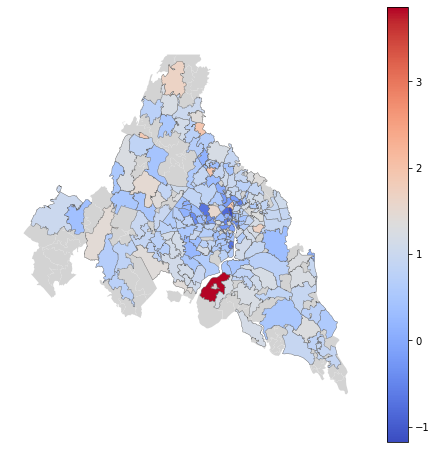

In [38]:
# year 2021 June

fig, ax = plt.subplots(1, figsize=(8, 8))
plt.xticks(rotation=90)
map_cz.to_crs(epsg=4326).plot(ax=ax, color='lightgray')
df21jun.plot(column="change_price", cmap="coolwarm", linewidth=0.4, ax=ax, edgecolor=".4", missing_kwds={'color': 'lightgrey'})

bar_info = plt.cm.ScalarMappable(cmap="coolwarm", norm=plt.Normalize(vmin=vmin, vmax=vmax))
bar_info._A = []
cbar = fig.colorbar(bar_info)


ax.axis("off");

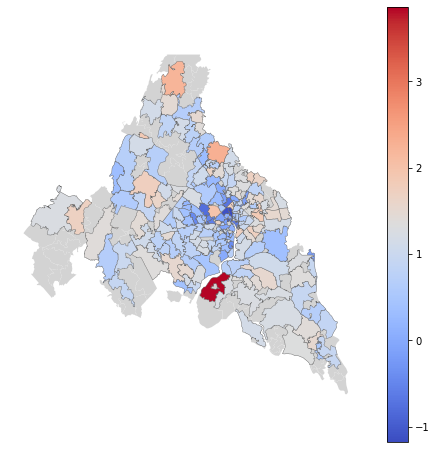

In [39]:
# year 2021 July

fig, ax = plt.subplots(1, figsize=(8, 8))
plt.xticks(rotation=90)
map_cz.to_crs(epsg=4326).plot(ax=ax, color='lightgray')
df21jul.plot(column="change_price", cmap="coolwarm", linewidth=0.4, ax=ax, edgecolor=".4", missing_kwds={'color': 'lightgrey'})

bar_info = plt.cm.ScalarMappable(cmap="coolwarm", norm=plt.Normalize(vmin=vmin, vmax=vmax))
bar_info._A = []
cbar = fig.colorbar(bar_info)


ax.axis("off");

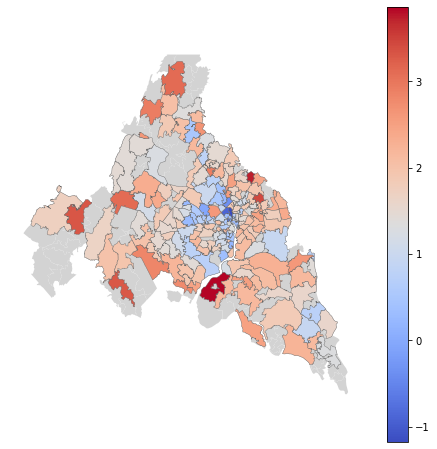

In [40]:
# year 2021 Aug

fig, ax = plt.subplots(1, figsize=(8, 8))
plt.xticks(rotation=90)
map_cz.to_crs(epsg=4326).plot(ax=ax, color='lightgray')
df21aug.plot(column="change_price", cmap="coolwarm", linewidth=0.4, ax=ax, edgecolor=".4", missing_kwds={'color': 'lightgrey'})

bar_info = plt.cm.ScalarMappable(cmap="coolwarm", norm=plt.Normalize(vmin=vmin, vmax=vmax))
bar_info._A = []
cbar = fig.colorbar(bar_info)


ax.axis("off");

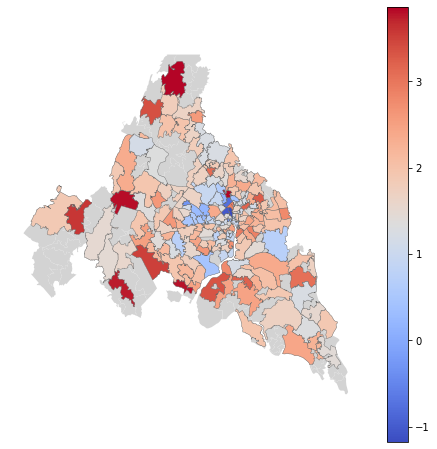

In [41]:
# year 2021 Sep

fig, ax = plt.subplots(1, figsize=(8, 8))
plt.xticks(rotation=90)
map_cz.to_crs(epsg=4326).plot(ax=ax, color='lightgray')
df21sep.plot(column="change_price", cmap="coolwarm", linewidth=0.4, ax=ax, edgecolor=".4", missing_kwds={'color': 'lightgrey'})

bar_info = plt.cm.ScalarMappable(cmap="coolwarm", norm=plt.Normalize(vmin=vmin, vmax=vmax))
bar_info._A = []
cbar = fig.colorbar(bar_info)


ax.axis("off");

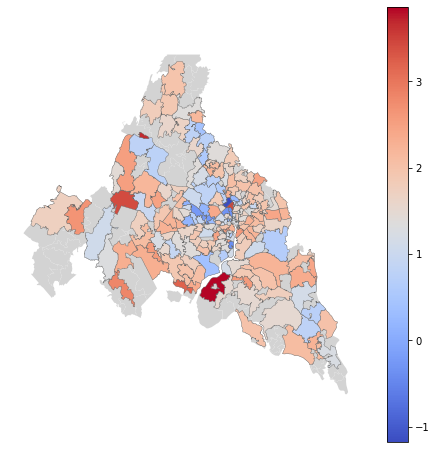

In [42]:
# year 2021 Oct

fig, ax = plt.subplots(1, figsize=(8, 8))
plt.xticks(rotation=90)
map_cz.to_crs(epsg=4326).plot(ax=ax, color='lightgray')
df21oct.plot(column="change_price", cmap="coolwarm", linewidth=0.4, ax=ax, edgecolor=".4", missing_kwds={'color': 'lightgrey'})

bar_info = plt.cm.ScalarMappable(cmap="coolwarm", norm=plt.Normalize(vmin=vmin, vmax=vmax))
bar_info._A = []
cbar = fig.colorbar(bar_info)


ax.axis("off");

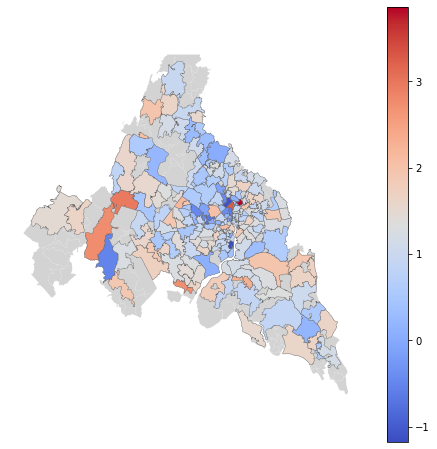

In [43]:
# year 2021 Nov

fig, ax = plt.subplots(1, figsize=(8, 8))
plt.xticks(rotation=90)
map_cz.to_crs(epsg=4326).plot(ax=ax, color='lightgray')
df21nov.plot(column="change_price", cmap="coolwarm", linewidth=0.4, ax=ax, edgecolor=".4", missing_kwds={'color': 'lightgrey'})

bar_info = plt.cm.ScalarMappable(cmap="coolwarm", norm=plt.Normalize(vmin=vmin, vmax=vmax))
bar_info._A = []
cbar = fig.colorbar(bar_info)


ax.axis("off");

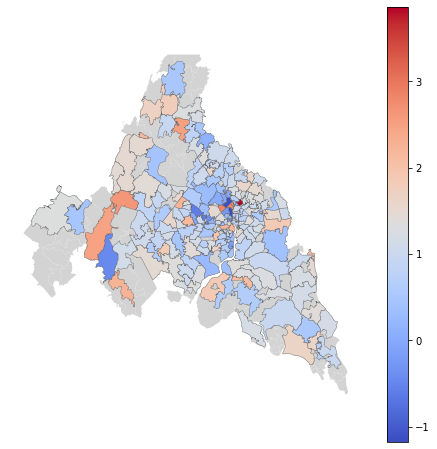

In [44]:
# year 2021 Dec

fig, ax = plt.subplots(1, figsize=(8, 8))
plt.xticks(rotation=90)
map_cz.to_crs(epsg=4326).plot(ax=ax, color='lightgray')
df21dec.plot(column="change_price", cmap="coolwarm", linewidth=0.4, ax=ax, edgecolor=".4", missing_kwds={'color': 'lightgrey'})

bar_info = plt.cm.ScalarMappable(cmap="coolwarm", norm=plt.Normalize(vmin=vmin, vmax=vmax))
bar_info._A = []
cbar = fig.colorbar(bar_info)


ax.axis("off");

In 2021, the housing price outside of the city kept rising rapidly.

For 2022, Jan - Apr (obserbed data) 

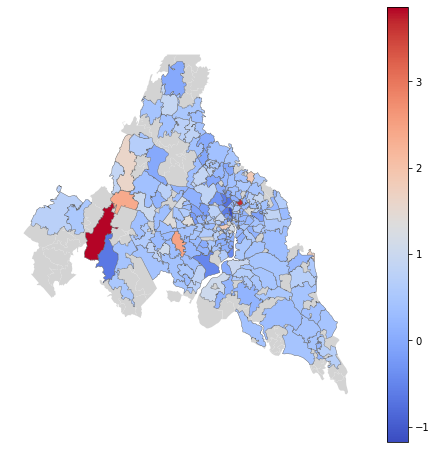

In [45]:
# 2022 jan
fig, ax = plt.subplots(1, figsize=(8, 8))
plt.xticks(rotation=90)
map_cz.to_crs(epsg=4326).plot(ax=ax, color='lightgray')

df22jan.plot(column="change_price", cmap="coolwarm", linewidth=0.4, ax=ax, edgecolor=".4")

bar_info = plt.cm.ScalarMappable(cmap="coolwarm", norm=plt.Normalize(vmin=vmin, vmax=vmax))
bar_info._A = []
cbar = fig.colorbar(bar_info)


ax.axis("off"); 

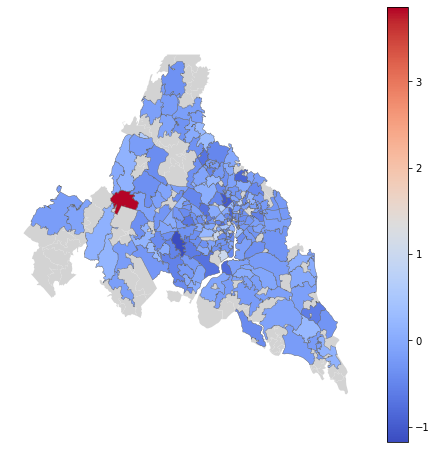

In [46]:
# 2022 feb 
fig, ax = plt.subplots(1, figsize=(8, 8))
plt.xticks(rotation=90)
map_cz.to_crs(epsg=4326).plot(ax=ax, color='lightgray')

df22feb.plot(column="change_price", cmap="coolwarm", linewidth=0.4, ax=ax, edgecolor=".4")

bar_info = plt.cm.ScalarMappable(cmap="coolwarm", norm=plt.Normalize(vmin=vmin, vmax=vmax))
bar_info._A = []
cbar = fig.colorbar(bar_info)


ax.axis("off"); 

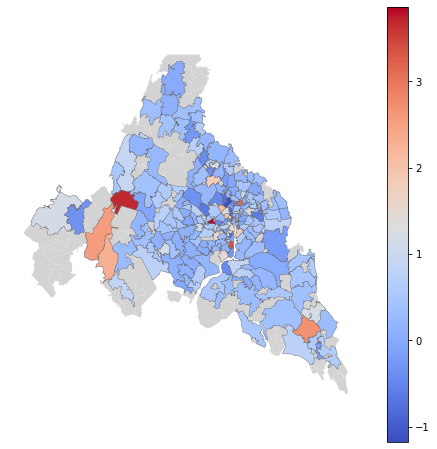

In [47]:
# 2022 march
fig, ax = plt.subplots(1, figsize=(8, 8))
plt.xticks(rotation=90)
map_cz.to_crs(epsg=4326).plot(ax=ax, color='lightgray')

df22mar.plot(column="change_price", cmap="coolwarm", linewidth=0.4, ax=ax, edgecolor=".4")

bar_info = plt.cm.ScalarMappable(cmap="coolwarm", norm=plt.Normalize(vmin=vmin, vmax=vmax))
bar_info._A = []
cbar = fig.colorbar(bar_info)


ax.axis("off"); 

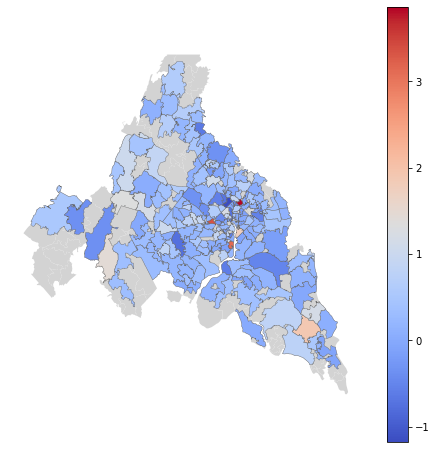

In [48]:
# 2022 april
fig, ax = plt.subplots(1, figsize=(8, 8))
plt.xticks(rotation=90)
map_cz.to_crs(epsg=4326).plot(ax=ax, color='lightgray')

df22apr.plot(column="change_price", cmap="coolwarm", linewidth=0.4, ax=ax, edgecolor=".4")

bar_info = plt.cm.ScalarMappable(cmap="coolwarm", norm=plt.Normalize(vmin=vmin, vmax=vmax))
bar_info._A = []
cbar = fig.colorbar(bar_info)


ax.axis("off"); 

Next, I plot my forecast for 2022 May - June.

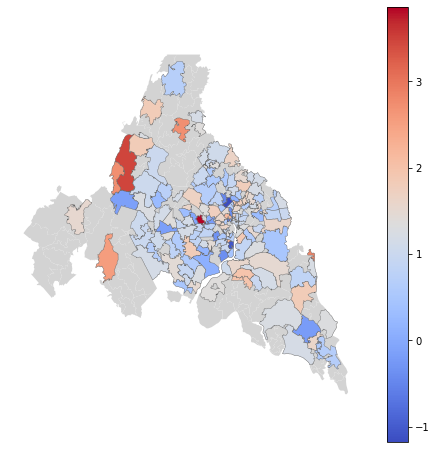

In [49]:
# 2022 may
fig, ax = plt.subplots(1, figsize=(8, 8))
plt.xticks(rotation=90)
map_cz.to_crs(epsg=4326).plot(ax=ax, color='lightgray')

df22may.plot(column="change_price", cmap="coolwarm", linewidth=0.4, ax=ax, edgecolor=".4")

bar_info = plt.cm.ScalarMappable(cmap="coolwarm", norm=plt.Normalize(vmin=vmin, vmax=vmax))
bar_info._A = []
cbar = fig.colorbar(bar_info)


ax.axis("off"); 

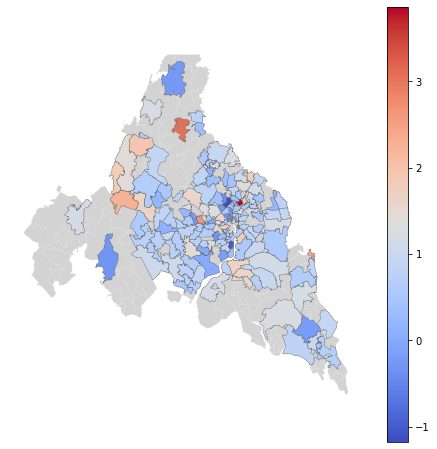

In [50]:
# 2022 jun
fig, ax = plt.subplots(1, figsize=(8, 8))
plt.xticks(rotation=90)
map_cz.to_crs(epsg=4326).plot(ax=ax, color='lightgray')

df22jun.plot(column="change_price", cmap="coolwarm", linewidth=0.4, ax=ax, edgecolor=".4")

bar_info = plt.cm.ScalarMappable(cmap="coolwarm", norm=plt.Normalize(vmin=vmin, vmax=vmax))
bar_info._A = []
cbar = fig.colorbar(bar_info)


ax.axis("off"); 

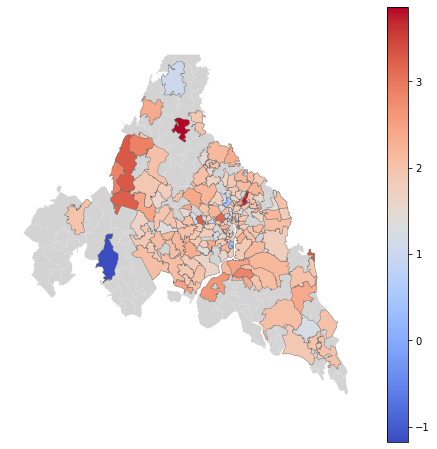

In [51]:
# 2022 Jul
fig, ax = plt.subplots(1, figsize=(8, 8))
plt.xticks(rotation=90)
map_cz.to_crs(epsg=4326).plot(ax=ax, color='lightgray')

df22jul.plot(column="change_price", cmap="coolwarm", linewidth=0.4, ax=ax, edgecolor=".4")

bar_info = plt.cm.ScalarMappable(cmap="coolwarm", norm=plt.Normalize(vmin=vmin, vmax=vmax))
bar_info._A = []
cbar = fig.colorbar(bar_info)


ax.axis("off"); 

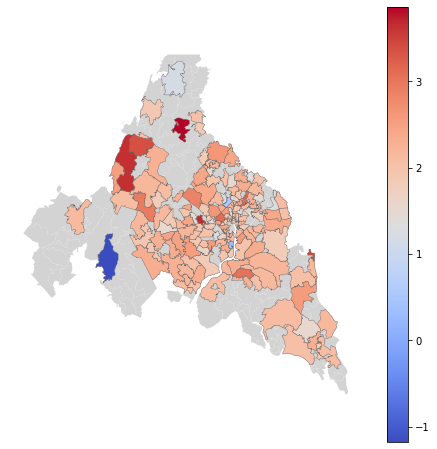

In [53]:
# 2022 aug
fig, ax = plt.subplots(1, figsize=(8, 8))
plt.xticks(rotation=90)
map_cz.to_crs(epsg=4326).plot(ax=ax, color='lightgray')

df22aug.plot(column="change_price", cmap="coolwarm", linewidth=0.4, ax=ax, edgecolor=".4")

bar_info = plt.cm.ScalarMappable(cmap="coolwarm", norm=plt.Normalize(vmin=vmin, vmax=vmax))
bar_info._A = []
cbar = fig.colorbar(bar_info)


ax.axis("off"); 

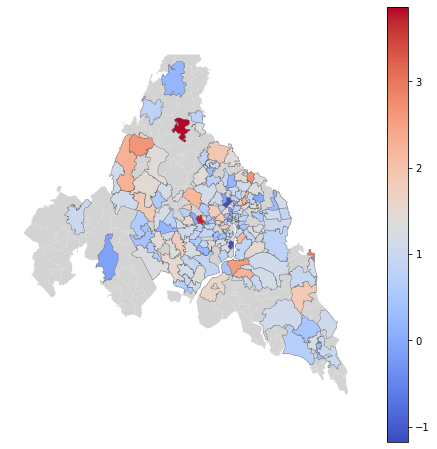

In [54]:
# 2022 Sep
fig, ax = plt.subplots(1, figsize=(8, 8))
plt.xticks(rotation=90)
map_cz.to_crs(epsg=4326).plot(ax=ax, color='lightgray')

df22sep.plot(column="change_price", cmap="coolwarm", linewidth=0.4, ax=ax, edgecolor=".4")

bar_info = plt.cm.ScalarMappable(cmap="coolwarm", norm=plt.Normalize(vmin=vmin, vmax=vmax))
bar_info._A = []
cbar = fig.colorbar(bar_info)


ax.axis("off"); 

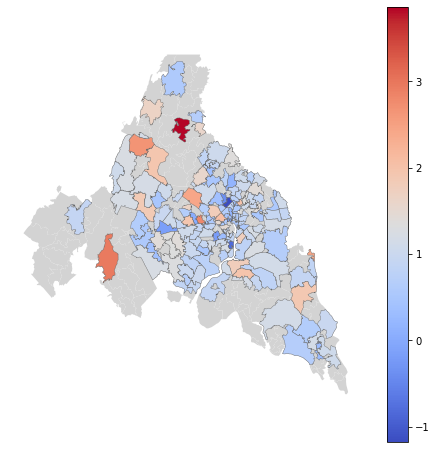

In [55]:
# 2022 Oct
fig, ax = plt.subplots(1, figsize=(8, 8))
plt.xticks(rotation=90)
map_cz.to_crs(epsg=4326).plot(ax=ax, color='lightgray')

df22oct.plot(column="change_price", cmap="coolwarm", linewidth=0.4, ax=ax, edgecolor=".4")

bar_info = plt.cm.ScalarMappable(cmap="coolwarm", norm=plt.Normalize(vmin=vmin, vmax=vmax))
bar_info._A = []
cbar = fig.colorbar(bar_info)


ax.axis("off"); 

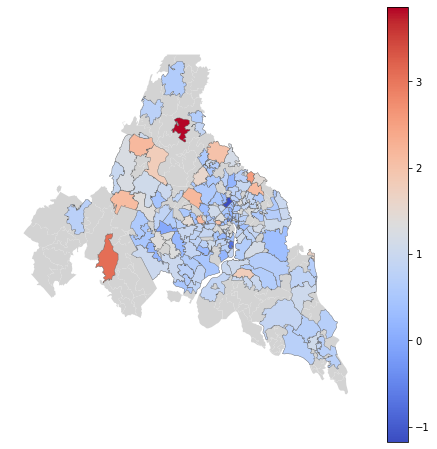

In [56]:
# 2022 Nov
fig, ax = plt.subplots(1, figsize=(8, 8))
plt.xticks(rotation=90)
map_cz.to_crs(epsg=4326).plot(ax=ax, color='lightgray')

df22nov.plot(column="change_price", cmap="coolwarm", linewidth=0.4, ax=ax, edgecolor=".4")

bar_info = plt.cm.ScalarMappable(cmap="coolwarm", norm=plt.Normalize(vmin=vmin, vmax=vmax))
bar_info._A = []
cbar = fig.colorbar(bar_info)


ax.axis("off"); 

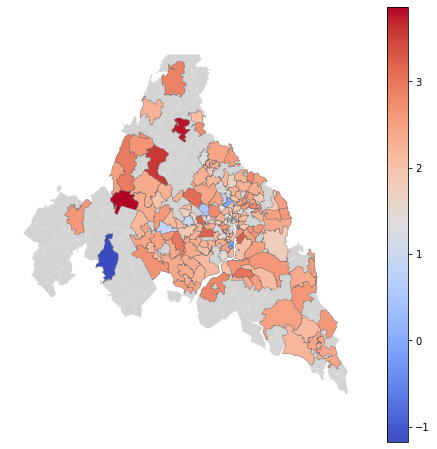

In [57]:
# 2022 Dec
fig, ax = plt.subplots(1, figsize=(8, 8))
plt.xticks(rotation=90)
map_cz.to_crs(epsg=4326).plot(ax=ax, color='lightgray')

df22dec.plot(column="change_price", cmap="coolwarm", linewidth=0.4, ax=ax, edgecolor=".4")

bar_info = plt.cm.ScalarMappable(cmap="coolwarm", norm=plt.Normalize(vmin=vmin, vmax=vmax))
bar_info._A = []
cbar = fig.colorbar(bar_info)


ax.axis("off"); 

My forecast shows that the trend of rising housing prices will slow down in 2022. But I still see some strong growth in some zip codes. 

Next, I plot the TOP 10 zip codes in terms of price changes in 2022. 

First, I create a new data frame for the TOP10 zip codes.  

In [13]:
top10 = df22.sort_values('change_price', ascending=False).head(20)

save = top10[['zipcode', 'CTFIPS', 'stateabbrev', 'change_price', 'median_listing_price', 'active_listing_count', 'netinflow']]

save.to_csv('Data/top10_22.csv')

I plot the top10 zip codes on top of the base map. 

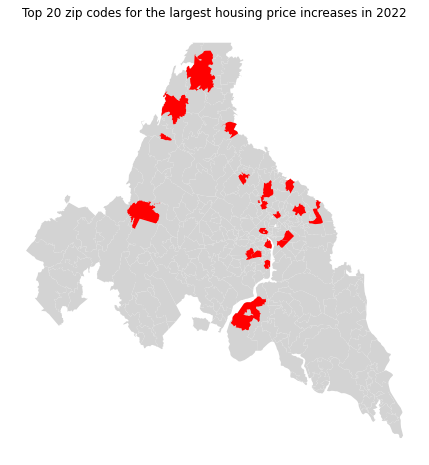

In [14]:
fig, ax = plt.subplots(figsize = (8,8))
map_cz.to_crs(epsg=4326).plot(ax=ax, color='lightgray')
top10.plot(ax=ax, color='red')
ax.set_title('Top 20 zip codes for the largest housing price increases in 2022')
ax.axis("off");

Next, I plot the TOP 10 zip codes in 2019 for comparison. 

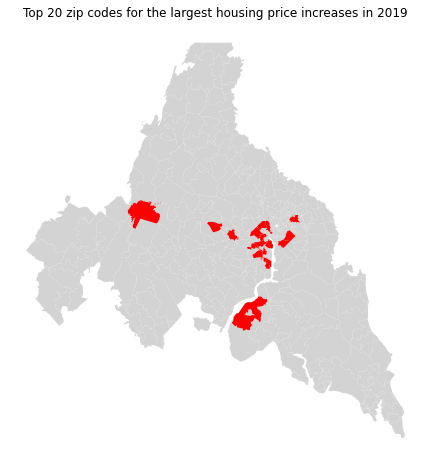

In [15]:
top10_19 = df19.sort_values('change_price', ascending=False).head(20)

fig, ax = plt.subplots(figsize = (8,8))
map_cz.to_crs(epsg=4326).plot(ax=ax, color='lightgray')
top10_19.plot(ax=ax, color='red')
ax.set_title('Top 20 zip codes for the largest housing price increases in 2019')
ax.axis("off");

In 2019, most TOP 20 zip codes are clustered around DC area. In 2022, the zip codes are more spread across Virginia and Maryland. My prediction follows a recent trend that people are moving out of large cities. 